# Load LumiNet
https://github.com/acdc-pv-unsw/LumiGAN

https://www.sciencedirect.com/science/article/pii/S2542435122001921?via%3Dihub

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pickle
import torch
import io
import sys

import os
import sys
# add parent directory so we can use scripts we create in this repo
sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd())))
# append LumiNet/LumiGAN directory to path so that package is recognized
sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), 'repos/LumiGAN'))
sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), 'repos/LumiNet'))

In [3]:
# utility class to load a GPU-trained model on a CPU-only computer
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: 
            print(module, name)
            if 'sklearn' in module: # fix pickle loading bug
                try:
                    return super().find_class(module, name)
                except ModuleNotFoundError:
                    # saved pickle isn't accessing the right modules, fix that
                    module = '.'.join(module.split('.')[:-1])
            return super().find_class(module, name)


In [4]:

# print(f'CUDA: {torch.cuda.is_available()}')
# with open('../repos/LumiGAN/Models/LumiGAN_model.pkl', 'rb') as f:
#     lumigan = CPU_Unpickler(f).load()


# lumigan

In [5]:
with open('../repos/LumiNet/Models/LumiNet_VGG_RF_Eff.pkl', 'rb') as f:
    luminet = CPU_Unpickler(f).load()


pandas._libs.interval Interval
numpy.core._multiarray_umath scalar
numpy dtype
pandas.core.frame DataFrame
pandas.core.internals.managers BlockManager
pandas.core.indexes.interval _new_IntervalIndex
pandas.core.indexes.interval IntervalIndex
pandas.core.indexes.base _new_Index
pandas.core.indexes.numeric Float64Index
numpy.core._multiarray_umath _reconstruct
numpy ndarray
builtins slice
pandas.core.indexes.base Index
pandas.core.indexes.range RangeIndex
torchvision.models.vgg VGG
collections OrderedDict
torch.nn.modules.container Sequential
torch.nn.modules.conv Conv2d
torch._utils _rebuild_parameter
torch._utils _rebuild_tensor_v2
torch.nn.modules.batchnorm BatchNorm2d
torch.nn.modules.activation ReLU
torch.nn.modules.pooling MaxPool2d
torch.nn.modules.pooling AdaptiveAvgPool2d
torch.nn.modules.linear Linear
torch.nn.modules.dropout Dropout
torch.nn.modules.batchnorm BatchNorm1d
sklearn.ensemble.forest RandomForestRegressor
sklearn.tree.tree DecisionTreeRegressor
sklearn.tree._tree Tr

/home/kcw/anaconda3/envs/fenning/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/kcw/anaconda3/envs/fenning/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.20.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/kcw/anaconda3/envs/fenning/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LinearRegression from version 0.20.2 when using ve

In [6]:
def print_dict(d, prefix=''):
    for k,v in d.items():
        row = f'{prefix}{k} {type(v)}'
        print(row)
        if type(v) is dict:
            print_dict(v, prefix+'\t')

print_dict(luminet)

CNN <class 'dict'>
	results <class 'dict'>
		Reference <class 'str'>
		Training ID <class 'str'>
		Total training time (s) <class 'str'>
		Average training time per epoch <class 'str'>
		Final training score <class 'str'>
		Best training score <class 'str'>
		Final testing score <class 'str'>
		Best testing score <class 'str'>
		Weighted Accuracy <class 'str'>
		Weighted F1-score <class 'str'>
		Weighted Precision <class 'str'>
		Weighted Recall <class 'str'>
		Recall - class 0 <class 'str'>
		Recall - class 1 <class 'str'>
		Recall - class 2 <class 'str'>
		Recall - class 3 <class 'str'>
		Recall - class 4 <class 'str'>
		Recall - class 5 <class 'str'>
		Recall - class 6 <class 'str'>
		Recall - class 7 <class 'str'>
		Recall - class 8 <class 'str'>
		Recall - class 9 <class 'str'>
		Recall - class 10 <class 'str'>
		Precision - class 0 <class 'str'>
		Precision - class 1 <class 'str'>
		Precision - class 2 <class 'str'>
		Precision - class 3 <class 'str'>
		Precision - class 4 <class

In [7]:
luminet['PARAMETERS']['CNN']

{'IMAGE_SIZE': 224,
 'PRETRAIN': True,
 'REQGRAD': True,
 'SUBSET_SIZE': None,
 'BATCH_SIZE': 17,
 'SPLIT_FRAC': 0.05,
 'N_EPOCHS': 20,
 'CM_FZ': 6,
 'MODEL': 'VGG',
 'TRANSFORM_AUG': Compose(
     Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
     Grayscale(num_output_channels=3)
     RandomHorizontalFlip(p=0.5)
     RandomVerticalFlip(p=0.5)
     ToTensor()
     Normalize(mean=[0.5], std=[0.5])
 ),
 'TRANSFORM': Compose(
     Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
     Grayscale(num_output_channels=3)
     ToTensor()
     Normalize(mean=[0.5], std=[0.5])
 ),
 'NCLASS': 11}

In [8]:
luminet['CNN']['vocab']

{'0': Interval(-inf, 19.0, closed='right'),
 '1': Interval(19.0, 19.2, closed='right'),
 '2': Interval(19.2, 19.4, closed='right'),
 '3': Interval(19.4, 19.6, closed='right'),
 '4': Interval(19.6, 19.8, closed='right'),
 '5': Interval(19.8, 20.0, closed='right'),
 '6': Interval(20.0, 20.2, closed='right'),
 '7': Interval(20.2, 20.4, closed='right'),
 '8': Interval(20.4, 20.6, closed='right'),
 '9': Interval(20.6, 20.8, closed='right'),
 '10': Interval(20.8, 21.0, closed='right')}

Num features: 2048
Biggest Feature: (105, 0.4251297790466148)


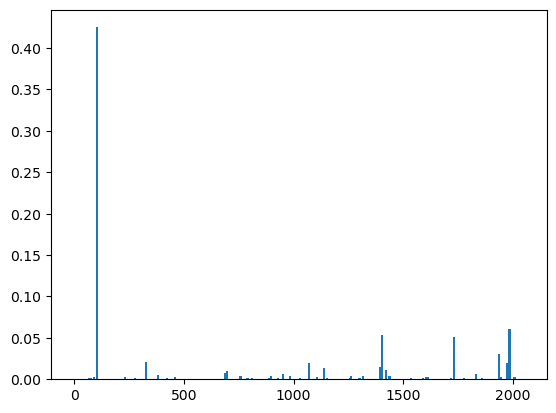

In [9]:
# determine importances of features
fi = luminet['ML']['model'].feature_importances_
print(f'Num features: {len(fi)}')
plt.bar(np.arange(len(fi)), fi, 10)
biggest = np.argmax(fi) # the most important feature
print(f'Biggest Feature: {biggest, fi[biggest]}')

In [10]:
# determine n most important features
fi_indices = np.argsort(fi)[::-1]

n = 30
n_important = fi_indices[:n]
print(f'Sum: {np.sum(fi[n_important])}')
np.stack([n_important, fi[n_important]], 1)

Sum: 0.8000423211757347


array([[1.05000000e+02, 4.25129779e-01],
       [1.98500000e+03, 6.09098999e-02],
       [1.40200000e+03, 5.30217083e-02],
       [1.73100000e+03, 5.15243269e-02],
       [1.93600000e+03, 3.00587492e-02],
       [3.25000000e+02, 2.13770081e-02],
       [1.97500000e+03, 2.00305182e-02],
       [1.07200000e+03, 1.98612800e-02],
       [1.39600000e+03, 1.51028241e-02],
       [1.13700000e+03, 1.30253780e-02],
       [1.42300000e+03, 1.13800083e-02],
       [6.96000000e+02, 1.05429240e-02],
       [6.89000000e+02, 7.06264067e-03],
       [9.50000000e+02, 6.43117778e-03],
       [1.83400000e+03, 5.77240049e-03],
       [3.83000000e+02, 4.66860668e-03],
       [8.96000000e+02, 4.43773919e-03],
       [9.83000000e+02, 4.28588179e-03],
       [7.58000000e+02, 4.00581427e-03],
       [1.43800000e+03, 3.91955584e-03],
       [1.31700000e+03, 3.78301395e-03],
       [1.26300000e+03, 3.38059421e-03],
       [1.60400000e+03, 3.16390139e-03],
       [1.10800000e+03, 2.95373384e-03],
       [1.945000

# Load PL Images and JV data

In [13]:
# load our pl images
chardir = '../data/output/20221011_B9-char_1/Characterization/'
jvdir = '../data/jv_pkl/20221102_B9_JV.pkl'

In [25]:
from frgpascal.analysis.processing import load_all
from natsort import index_natsorted

def load_all_sorted(chardir):
	metricdf, rawdf = load_all(
		chardir,
		t_kwargs=dict(
			wlmin=700,
			wlmax=900
		)
	)
	rawdf= rawdf.sort_values(
   		by='name',
   		key=lambda x: np.argsort(index_natsorted(rawdf['name']))
    )
	rawdf = rawdf.reset_index(drop=True)


	metricdf= metricdf.sort_values(
    	by='name',
    	key=lambda x: np.argsort(index_natsorted(metricdf['name']))
    )
	metricdf = metricdf.reset_index(drop=True)
	return metricdf, rawdf

metricdf, rawdf = load_all_sorted(chardir)

Loading data:   0%|          | 0/31 [00:00<?, ?sample/s]/home/kcw/anaconda3/envs/fenning/lib/python3.7/site-packages/frgpascal/analysis/processing.py:103: RuntimeWarning: invalid value encountered in log10
  a = -np.log10(t)
Loading data:  13%|█▎        | 4/31 [00:02<00:15,  1.71sample/s]/home/kcw/anaconda3/envs/fenning/lib/python3.7/site-packages/frgpascal/analysis/processing.py:103: RuntimeWarning: divide by zero encountered in log10
  a = -np.log10(t)
Loading data: 100%|██████████| 31/31 [00:18<00:00,  1.71sample/s]


In [32]:
import itertools

def compress_jv(pkl_path):    
    df_jv =  pd.read_pickle(pkl_path)
    df_jv = df_jv.rename(columns={'PASCAL_ID': 'name'})

    metrics = df_jv.columns.drop(['name', 'direction'])
    dirs = ['f', 'r']
    cols = [f'{m}_{d}' for m,d in itertools.product(metrics, dirs)]
    for c in cols: # initialize columns
        df_jv[c] = None

    for n in range(df_jv.shape[0]):
        d = 'f' if df_jv['direction'][n] == 'fwd' else 'r'
        for m in metrics:
            df_jv[f'{m}_{d}'][n] = df_jv[m][n]
            
    test = pd.DataFrame(columns=['name'] + cols)
    test['name'] = list(df_jv['name'].unique())
    test[''] = test['name']
    test = test.set_index('')


    for n in range(df_jv.shape[0]):
        d = 'f' if df_jv['direction'][n] == 'fwd' else 'r'
        for m in metrics:
            test[f'{m}_{d}'][df_jv['name'][n]] = df_jv[m][n]

                
    return test

jv = compress_jv(jvdir).sort_index().convert_dtypes()
jv = jv.reindex(np.arange(len(rawdf)))
jv

/home/kcw/anaconda3/envs/fenning/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kcw/anaconda3/envs/fenning/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,name,pce_f,pce_r,ff_f,ff_r,voc_f,voc_r,jsc_f,jsc_r,rsh_f,rsh_r,rs_f,rs_r,rch_f,rch_r
,,,,,,,,,,,,,,,
0,0,14.73,14.24,75.88,74.79,1014.5,985.7,19.13,19.31,11.856,2.468,0.0082,0.008,0.0504,0.0354
1,1,13.73,13.7,69.57,69.94,963.0,960.2,20.49,20.41,9.574,17.379,0.0094,0.0086,0.047,0.034
2,2,10.83,10.91,52.74,54.67,1026.3,999.6,20.01,19.96,0.308,0.135,0.0153,0.0104,0.0573,0.0579
3,3,14.48,13.89,72.48,72.55,1030.4,983.1,19.4,19.47,4.372,8.331,0.0094,0.0071,0.0457,0.0427
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,6,5.68,5.7,32.16,32.4,919.5,912.5,19.22,19.28,0.055,0.055,0.0203,0.0215,0.0632,0.0624
7,7,13.82,13.81,66.12,66.62,1020.3,1011.3,20.49,20.5,1.884,3.683,0.0096,0.0091,0.0396,0.0401
8,8,15.34,14.79,77.74,75.23,1006.8,990.0,19.6,19.86,7.28,2.246,0.0064,0.0079,0.0359,0.0351


In [33]:
# crop our pl images
from frgtrainview.analysis.crop import crop_pl

pl = rawdf['plimg_0'].apply(lambda img: crop_pl(np.uint8(img * 255), output_shape=(256,256))[0])
pl = np.stack(pl.values)
pl.shape

(31, 256, 256, 3)

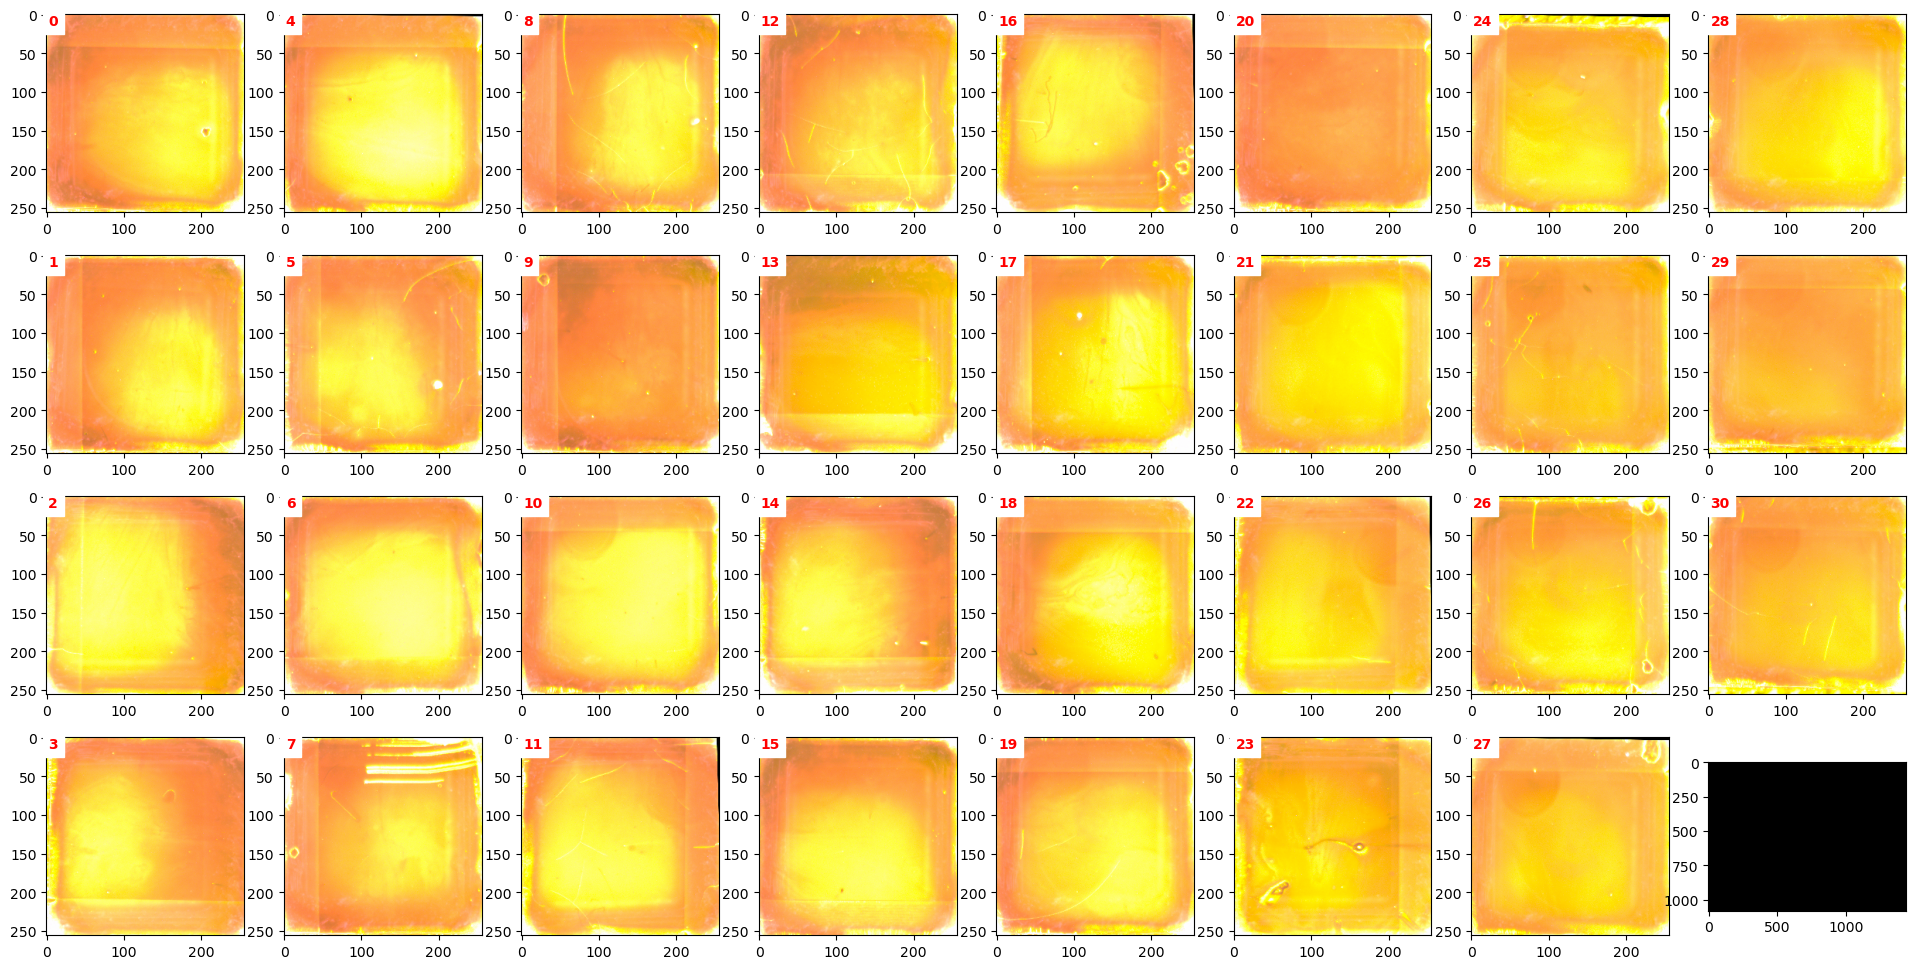

In [34]:
# view whole batch of cropped pl images

vert = 4
horiz = 8
embiggen = 3
item = 0
blank = rawdf['plimg_0'].iloc[0]*0

fig, ax = plt.subplots(vert, horiz, figsize = (horiz*embiggen, vert*embiggen), constrained_layout=False)

for k in range(horiz):
    for n in range(vert):
        if item < len(pl):
            img = pl[item]
            ax[n,k].imshow(img)
            plt.text(0.01, 1, s = f'{item}', horizontalalignment='left', verticalalignment='top', transform=ax[n,k].transAxes, color='Red', weight='bold', backgroundcolor='White')

        else:
            ax[n,k].imshow(blank)
            
        item += 1


# Use LumiNet model
Use the pretrained LumiNet model to see what PCE we get for our PL images.

In [35]:
# first use the cnn

imgs = np.moveaxis(pl, 3, 1) # change from HWC to CHW
imgs = torch.Tensor(imgs)
feature_vec = luminet['CNN']['model_extractor'](imgs)

feature_vec # this is the cnn feature vector

tensor([[   0.0000, 1358.6219,    0.0000,  ..., 6227.0820,    0.0000,
           45.7390],
        [   0.0000, 1246.7274,    0.0000,  ..., 6553.2495,    0.0000,
          114.9862],
        [   0.0000,  972.8629,    0.0000,  ..., 6890.6440,    0.0000,
          361.0128],
        ...,
        [   0.0000,  858.9283,    0.0000,  ..., 7756.8999,    0.0000,
            0.0000],
        [   0.0000, 1556.3413,    0.0000,  ..., 4640.3198,    0.0000,
          396.5132],
        [   0.0000, 1348.7760,    0.0000,  ..., 6288.9019,    0.0000,
            0.0000]], grad_fn=<ReluBackward0>)

In [39]:
# now plug in to the ML regressor

pce_pred = luminet['ML']['model'].predict(feature_vec.detach().numpy())
pce_pred

array([19.17838237, 19.17975501, 19.18098904, 19.2196927 , 19.17559955,
       19.18331588, 19.17919932, 19.18028283, 19.1820772 , 19.20248907,
       19.17934575, 19.17720492, 19.17854055, 19.17780778, 19.17550728,
       19.17807182, 19.17883777, 19.17687909, 19.1761854 , 19.17972018,
       19.19855006, 19.17675983, 19.17610681, 19.17588963, 19.17983102,
       19.17521042, 19.18129576, 19.18257631, 19.18304804, 19.21252147,
       19.18202176])

In [58]:
# determine the error
from sklearn.metrics import mean_absolute_error, mean_squared_error

pce_df = pd.DataFrame([jv['pce_f'], pce_pred], index={'pce_true', 'pce_pred'}).T
pce_df = pce_df.dropna()

print(f'RMSE: {mean_squared_error(pce_df["pce_true"], pce_df["pce_pred"], squared=False)}')
print(f'MAE: {mean_absolute_error(pce_df["pce_true"], pce_df["pce_pred"])}')
pce_df

RMSE: 7.81603690521816
MAE: 6.728609162960493


,pce_true,pce_pred
,,
0,14.73,19.178382
1,13.73,19.179755
2,10.83,19.180989
3,14.48,19.219693
6,5.68,19.179199
7,13.82,19.180283
8,15.34,19.182077
9,14.85,19.202489
11,10.39,19.177205


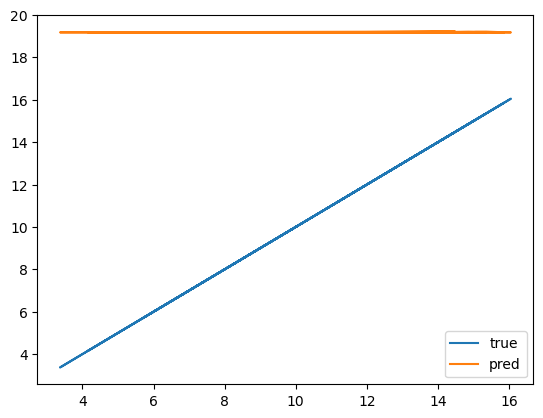

In [60]:
# visualize the prediction vs truth

plt.plot(pce_df['pce_true'], pce_df['pce_true'], label='true')
plt.plot(pce_df['pce_true'], pce_df['pce_pred'], label='pred')
plt.legend()

In [61]:
df = pd.DataFrame(feature_vec.detach().numpy())
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,31.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,31.0,1108.773071,233.362656,613.665039,935.403137,1102.736572,1300.114868,1556.341309
2,31.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,31.0,2815.038574,509.153931,1461.867310,2682.482666,2848.291992,3160.313843,3787.468994
4,31.0,18938.101562,1995.059082,14311.371094,18018.283203,19350.847656,20296.839844,23237.523438
...,...,...,...,...,...,...,...,...
2043,31.0,1392.116943,244.619293,953.964478,1260.282166,1413.941162,1533.119507,2205.852295
2044,31.0,10190.420898,503.413940,9261.367188,9942.679199,10219.214844,10596.675781,11328.134766
2045,31.0,6748.318848,945.289734,4600.625000,6342.150146,6890.644043,7336.822998,8795.020508
2046,31.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


torch.Size([31, 2048])


<BarContainer object of 2048 artists>

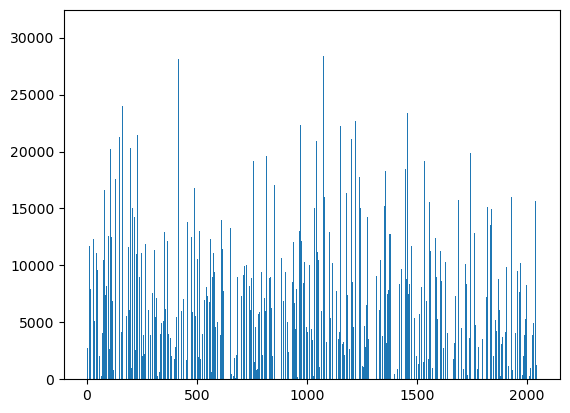

In [62]:
# visualize the feature vector output from cnn
print(feature_vec.shape)
plt.bar(np.arange(2048), feature_vec.detach().numpy()[0], width=1.4)